In [1]:
from numpy.random import seed
seed(101)

import pandas as pd
import numpy as np


import os
import cv2

import imageio
import skimage
import skimage.io
import skimage.transform

from skimage.io import imread, imshow
from skimage.transform import resize


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir("G:\Web")

['Dataset1', 'mask']

In [3]:
NUM_TEST_IMAGES = 100

IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3

BATCH_SIZE = 100

In [4]:
# Dataset: pulmonary-chest-xray-abnormalities
# Here only the Montgomery images have masks. The Shenzhen don't have masks.

os.listdir('G:\Web\Dataset1')

['ChinaSet_AllFiles', 'Montgomery']

In [8]:
# Dataset: shcxr-lung-mask dataset
# These are the masks for the Shenzhen images.

os.listdir('G:\Web\mask')

['CHNCXR_0001_0_mask.png',
 'CHNCXR_0002_0_mask.png',
 'CHNCXR_0003_0_mask.png',
 'CHNCXR_0004_0_mask.png',
 'CHNCXR_0005_0_mask.png',
 'CHNCXR_0006_0_mask.png',
 'CHNCXR_0007_0_mask.png',
 'CHNCXR_0008_0_mask.png',
 'CHNCXR_0009_0_mask.png',
 'CHNCXR_0010_0_mask.png',
 'CHNCXR_0011_0_mask.png',
 'CHNCXR_0012_0_mask.png',
 'CHNCXR_0013_0_mask.png',
 'CHNCXR_0014_0_mask.png',
 'CHNCXR_0015_0_mask.png',
 'CHNCXR_0016_0_mask.png',
 'CHNCXR_0017_0_mask.png',
 'CHNCXR_0018_0_mask.png',
 'CHNCXR_0019_0_mask.png',
 'CHNCXR_0020_0_mask.png',
 'CHNCXR_0021_0_mask.png',
 'CHNCXR_0022_0_mask.png',
 'CHNCXR_0023_0_mask.png',
 'CHNCXR_0024_0_mask.png',
 'CHNCXR_0026_0_mask.png',
 'CHNCXR_0027_0_mask.png',
 'CHNCXR_0028_0_mask.png',
 'CHNCXR_0029_0_mask.png',
 'CHNCXR_0030_0_mask.png',
 'CHNCXR_0031_0_mask.png',
 'CHNCXR_0032_0_mask.png',
 'CHNCXR_0033_0_mask.png',
 'CHNCXR_0034_0_mask.png',
 'CHNCXR_0035_0_mask.png',
 'CHNCXR_0041_0_mask.png',
 'CHNCXR_0042_0_mask.png',
 'CHNCXR_0043_0_mask.png',
 

In [5]:
shen_image_list = \
os.listdir('G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png')
shen_mask_list = os.listdir('G:\\Web\\mask\\mask')

mont_image_list = \
os.listdir('G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png')
mont_left_mask_list = \
os.listdir('G:\\Web\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\leftMask')
mont_right_mask_list = \
os.listdir('G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\rightMask')



def find_non_images(image_list):
  
  """
  Checks a list and returns a list of items 
  that are not png images.
  
  """
  
  non_image_list = []
  
  for fname in image_list:
    # split on the full stop
    fname_list = fname.split('.')

    # select the extension
    extension = fname_list[1]

    if extension != 'png':
      non_image_list.append(fname)

  return non_image_list

In [6]:
# Non images in Shenzhen folder
non_images = find_non_images(shen_image_list)

non_images

['Thumbs.db']

In [7]:
# Non images in Shenzhen mask folder
non_images = find_non_images(shen_mask_list)

non_images

[]

In [8]:
# Non images in Montgomery image folder
non_images = find_non_images(mont_image_list)

non_images

['Thumbs.db']

In [9]:
# Non images in Montgomery right mask folder
non_images = find_non_images(mont_right_mask_list)

non_images

[]

In [15]:
# Mongomery images
# 138 (excl. Thumbs.db)
print(len(os.listdir('G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png')))

# Mongomery left masks
# 138 (excl. Thumbs.db)
print(len(os.listdir('G:\\Web\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\leftMask')))

# Mongomery right masks
# 138
print(len(os.listdir('G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\rightMask')))



# Shenzhen images
# 662 (excl. Thumbs.db)
print(len(os.listdir('G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png')))

# Shenzhen masks
# 566
print(len(os.listdir('G:\\Web\\mask\\mask')))

139
139
138
663
566


In [10]:
shen_image_list = os.listdir('G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png')

mont_image_list = os.listdir('G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png')

In [11]:
# put the images into dataframes
df_shen = pd.DataFrame(shen_image_list, columns=['image_id'])
df_mont = pd.DataFrame(mont_image_list, columns=['image_id'])

# remove the 'Thunbs.db' line
df_shen = df_shen[df_shen['image_id'] != 'Thumbs.db']
df_mont = df_mont[df_mont['image_id'] != 'Thumbs.db']

# Reset the index or this will cause an error later
df_shen.reset_index(inplace=True, drop=True)
df_mont.reset_index(inplace=True, drop=True)

print(df_shen.shape)
print(df_mont.shape)

(662, 1)
(138, 1)


In [12]:
df_shen.head()

image_id
0  CHNCXR_0001_0.png
1  CHNCXR_0002_0.png
2  CHNCXR_0003_0.png
3  CHNCXR_0004_0.png
4  CHNCXR_0005_0.png

In [13]:
df_mont.head()

image_id
0  MCUCXR_0001_0.png
1  MCUCXR_0002_0.png
2  MCUCXR_0003_0.png
3  MCUCXR_0004_0.png
4  MCUCXR_0005_0.png

In [14]:
# Put the Shenzhen masks into a dataframe

shen_mask_list = os.listdir('G:\\Web\\mask\\mask')

df_shen_masks = pd.DataFrame(shen_mask_list, columns=['mask_id'])

# create a new column with the image_id that corresponds to each mask

# example mask_id: CHNCXR_0001_0_mask.png

def create_image_id(x):
  
  # split on '_mask'
  fname_list = x.split('_mask')
  image_id = fname_list[0] + fname_list[1]
  
  return image_id
  
# create a new column
df_shen_masks['image_id'] = df_shen_masks['mask_id'].apply(create_image_id)

df_shen_masks.head()

mask_id           image_id
0  CHNCXR_0001_0_mask.png  CHNCXR_0001_0.png
1  CHNCXR_0002_0_mask.png  CHNCXR_0002_0.png
2  CHNCXR_0003_0_mask.png  CHNCXR_0003_0.png
3  CHNCXR_0004_0_mask.png  CHNCXR_0004_0.png
4  CHNCXR_0005_0_mask.png  CHNCXR_0005_0.png

In [15]:
df_shen = pd.merge(df_shen, df_shen_masks, on='image_id')

df_shen.head()

image_id                 mask_id
0  CHNCXR_0001_0.png  CHNCXR_0001_0_mask.png
1  CHNCXR_0002_0.png  CHNCXR_0002_0_mask.png
2  CHNCXR_0003_0.png  CHNCXR_0003_0_mask.png
3  CHNCXR_0004_0.png  CHNCXR_0004_0_mask.png
4  CHNCXR_0005_0.png  CHNCXR_0005_0_mask.png

In [16]:
df_shen.shape

(566, 2)

In [17]:
# Function to select the 4th index from the end of the string (file name)
# CHNCXR_0470_1.png --> 1 is the label, meaning TB is present.

def extract_target(x):
    target = int(x[-5])
    if target == 0:
        return 'Normal'
    if target == 1:
        return 'Tuberculosis'

In [18]:
# Assign the target labels

df_shen['target'] = df_shen['image_id'].apply(extract_target)

df_mont['target'] = df_mont['image_id'].apply(extract_target)

In [19]:
# Shenzen Dataset

df_shen['target'].value_counts()

Tuberculosis    287
Normal          279
Name: target, dtype: int64

In [20]:
# Montgomery Dataset

df_mont['target'].value_counts()

Normal          80
Tuberculosis    58
Name: target, dtype: int64

In [21]:
def draw_category_images(col_name,figure_cols, df, IMAGE_PATH):
    
    """
    Give a column in a dataframe,
    this function takes a sample of each class and displays that
    sample on one row. The sample size is the same as figure_cols which
    is the number of columns in the figure.
    Because this function takes a random sample, each time the function is run it
    displays different images.
    """
    

    categories = (df.groupby([col_name])[col_name].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                         figsize=(4*figure_cols,4*len(categories))) # adjust size here
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[col_name]==cat].sample(figure_cols) # figure_cols is also the sample size
        for j in range(0,figure_cols):
            file=IMAGE_PATH + sample.iloc[j]['image_id']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True, cmap='gray')
            ax[i, j].set_title(cat, fontsize=14)  
    plt.tight_layout()
    plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_58308\2844945305.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread(file)


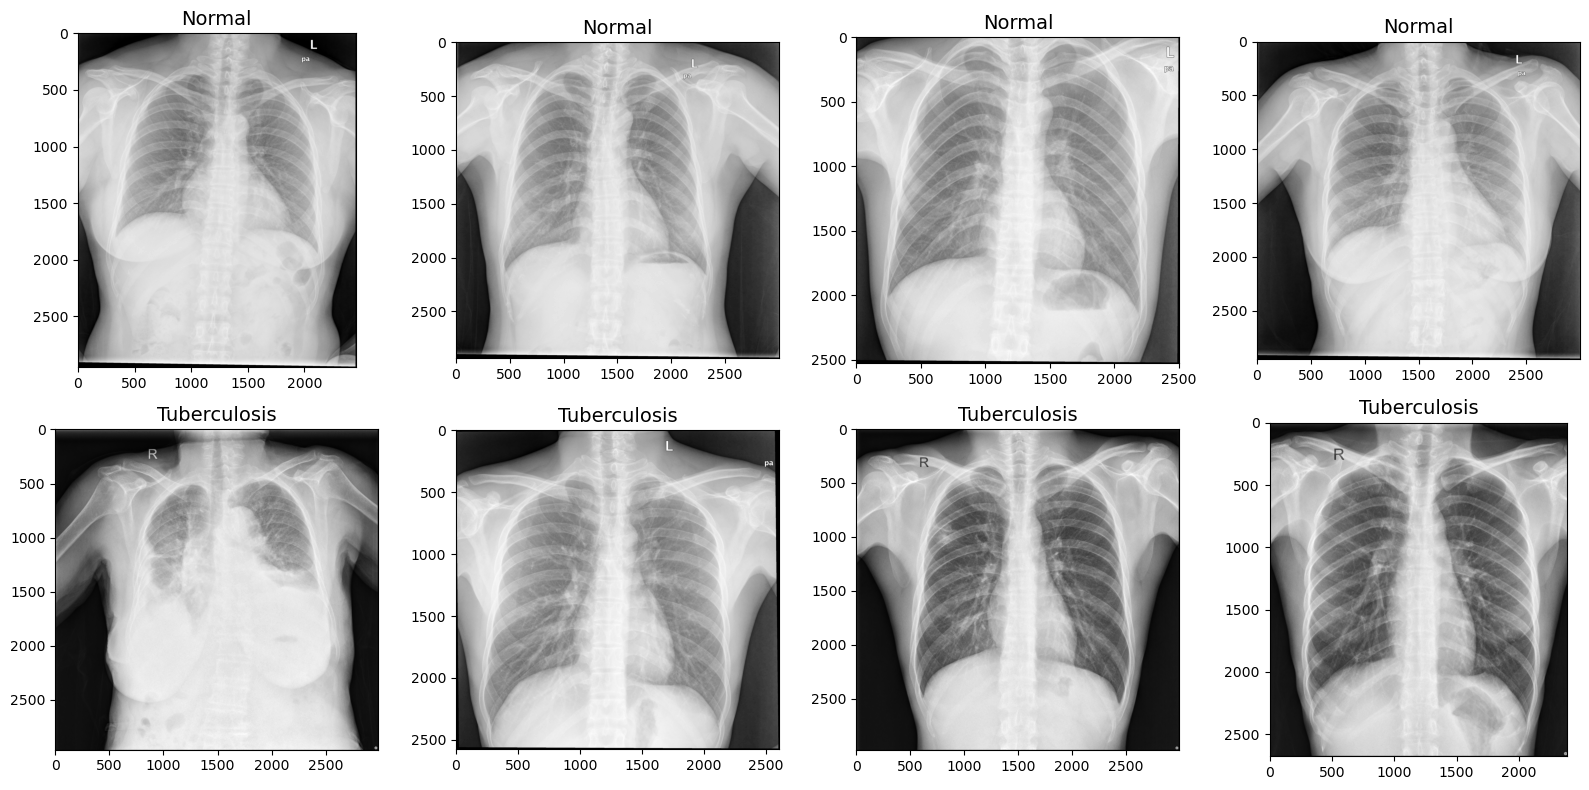

In [22]:
# Shenzen Dataset

IMAGE_PATH = 'G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png\\'

draw_category_images('target',4, df_shen, IMAGE_PATH)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_58308\2844945305.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im=imageio.imread(file)


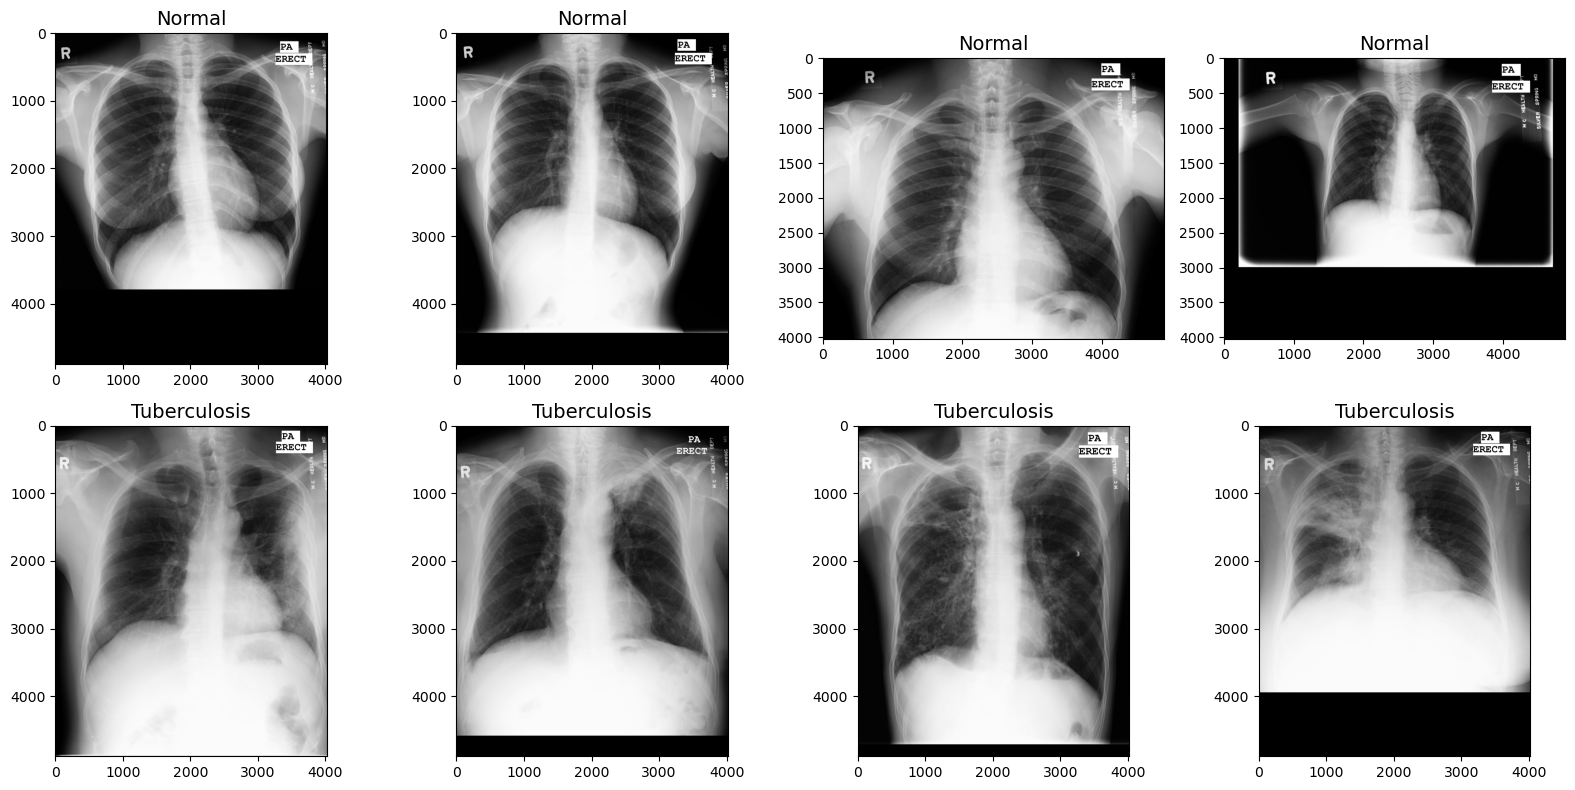

In [23]:
# Montgomery Dataset

IMAGE_PATH = 'G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png\\'

draw_category_images('target',4, df_mont, IMAGE_PATH)

In [24]:
def read_image_sizes(file_name):
    image = cv2.imread(IMAGE_PATH + file_name)
    max_pixel_val = image.max()
    min_pixel_val = image.min()
    
    # image.shape[2] represents the number of channels: (height, width, num_channels).
    # Here we are saying: If the shape does not have a value for num_channels (height, width)
    # then assign 1 to the number of channels.
    if len(image.shape) > 2: # i.e. more than two numbers in the tuple
        output = [image.shape[0], image.shape[1], image.shape[2], max_pixel_val, min_pixel_val]
    else:
        output = [image.shape[0], image.shape[1], 1, max_pixel_val, min_pixel_val]
    return output

In [25]:
IMAGE_PATH = 'G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png\\'

m = np.stack(df_shen['image_id'].apply(read_image_sizes))
df = pd.DataFrame(m,columns=['w','h','c','max_pixel_val','min_pixel_val'])
df_shen = pd.concat([df_shen,df],axis=1, sort=False)

df_shen.head()

image_id                 mask_id  target     w     h  c  \
0  CHNCXR_0001_0.png  CHNCXR_0001_0_mask.png  Normal  2919  3000  3   
1  CHNCXR_0002_0.png  CHNCXR_0002_0_mask.png  Normal  2951  3000  3   
2  CHNCXR_0003_0.png  CHNCXR_0003_0_mask.png  Normal  2945  2987  3   
3  CHNCXR_0004_0.png  CHNCXR_0004_0_mask.png  Normal  2933  3000  3   
4  CHNCXR_0005_0.png  CHNCXR_0005_0_mask.png  Normal  2933  3000  3   

   max_pixel_val  min_pixel_val  
0            255              0  
1            255              0  
2            255              0  
3            255              0  
4            255              0

In [26]:
IMAGE_PATH = 'G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png\\'

m = np.stack(df_mont['image_id'].apply(read_image_sizes))
df = pd.DataFrame(m,columns=['w','h','c','max_pixel_val','min_pixel_val'])
df_mont = pd.concat([df_mont,df],axis=1, sort=False)

df_mont.head()

image_id  target     w     h  c  max_pixel_val  min_pixel_val
0  MCUCXR_0001_0.png  Normal  4020  4892  3            255              0
1  MCUCXR_0002_0.png  Normal  4020  4892  3            255              0
2  MCUCXR_0003_0.png  Normal  4892  4020  3            255              0
3  MCUCXR_0004_0.png  Normal  4892  4020  3            255              0
4  MCUCXR_0005_0.png  Normal  4892  4020  3            255              0

In [38]:
df_shen['c'].value_counts()

3    566
Name: c, dtype: int64

In [39]:
df_mont['c'].value_counts()

3    138
Name: c, dtype: int64

# Display one Montgomery image and mask

In the Mongomery dataset there are separate masks for the left lung and right lung. We will combine these two masks into one by simply adding the matrices. 
Each mask has the same file name as it's corresponding image.

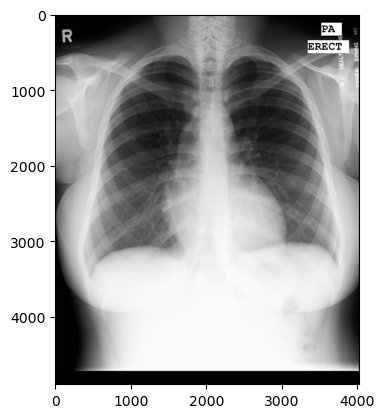

In [40]:
# print a Montgomery image and mask

# image
index = 2
fname = df_mont.loc[index, 'image_id']
path = 'G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\CXR_png\\' + fname
# read the image as a matrix
image = plt.imread(path)

plt.imshow(image, cmap='gray')

In [44]:
fname = df_mont.loc[index, 'image_id']

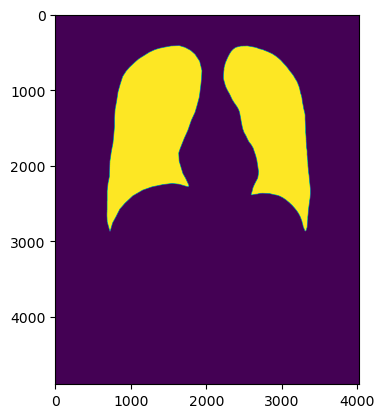

In [45]:
# left mask
path = 'G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\leftMask\\' + fname
left_mask = plt.imread(path)

# right mask
path = 'G:\\Web\\Dataset1\\Montgomery\\MontgomerySet\\ManualMask\\rightMask\\' + fname
right_mask = plt.imread(path)

# combine both masks
mask = left_mask + right_mask

plt.imshow(mask)

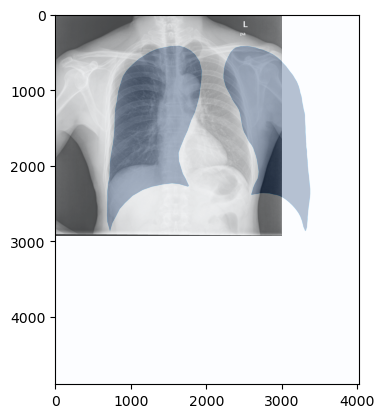

In [46]:
# display the Montgomery image and mask

plt.imshow(image, cmap='gray')
plt.imshow(mask, cmap='Blues', alpha=0.3)

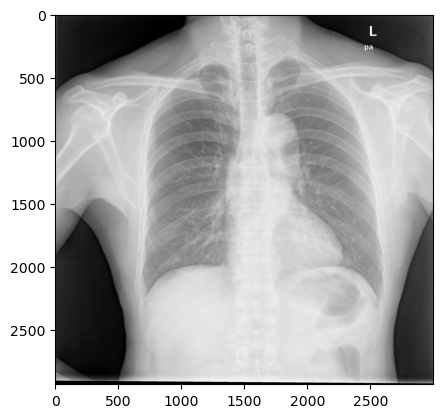

In [47]:
index = 3
fname = df_shen.loc[index, 'image_id']
path = 'G:\\Web\\Dataset1\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png\\' + fname

# read the image as a matrix
image = plt.imread(path)

plt.imshow(image, cmap='gray')

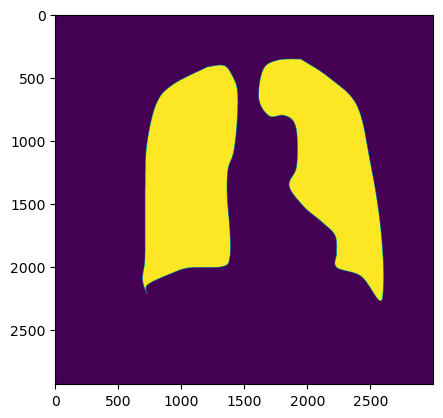

In [48]:
fname = df_shen.loc[index, 'image_id']

mask_name = fname.split('.')
mask_name = mask_name[0] + '_mask.png'


# left mask
path = 'G:\\Web\\mask\\' + mask_name
mask = plt.imread(path)


plt.imshow(mask)

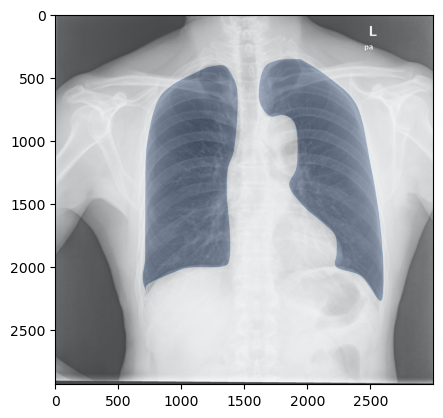

In [49]:
# display the Shenzhen image and mask

plt.imshow(image, cmap='gray')
plt.imshow(mask, cmap='Blues', alpha=0.3)

# Create a dataframe containing all images

In [50]:
### Combine the two dataframes and shuffle

df_data = pd.concat([df_shen, df_mont], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)


df_data.shape

(704, 8)

In [51]:
# Create a new column called 'labels' that maps the classes to binary values.
df_data['labels'] = df_data['target'].map({'Normal':0, 'Tuberculosis':1})

In [52]:
df_data.head()

image_id                 mask_id        target     w     h  c  \
701  MCUCXR_0390_1.png                     NaN  Tuberculosis  4892  4020  3   
296  CHNCXR_0365_1.png  CHNCXR_0365_1_mask.png  Tuberculosis  2808  2458  3   
163  CHNCXR_0171_0.png  CHNCXR_0171_0_mask.png        Normal  2991  2991  3   
610  MCUCXR_0059_0.png                     NaN        Normal  4892  4020  3   
458  CHNCXR_0549_1.png  CHNCXR_0549_1_mask.png  Tuberculosis  2448  2371  3   

     max_pixel_val  min_pixel_val  labels  
701            255              0       1  
296            255              0       1  
163            255              0       0  
610            255              0       0  
458            255              0       1

# Create a holdout test set

In [53]:
# create a test set
df_test = df_data.sample(NUM_TEST_IMAGES, random_state=101)

# Reset the index.
df_test = df_test.reset_index(drop=True)

# create a list of test images
test_images_list = list(df_test['image_id'])


# Select only rows that are not part of the test set.
# Note the use of ~ to execute 'not in'.
df_data = df_data[~df_data['image_id'].isin(test_images_list)]

print(df_data.shape)
print(df_test.shape)

(604, 9)
(100, 9)


# Train Test Split

In [54]:
# train_test_split

# We will stratify by target (TB or Normal)

y = df_data['labels']

df_train, df_val = train_test_split(df_data, test_size=0.4, random_state=101, stratify=y)

print(df_train.shape)
print(df_val.shape)

(422, 9)
(182, 9)


In [55]:
df_train['target'].value_counts()

Normal          217
Tuberculosis    205
Name: target, dtype: int64

In [56]:
df_val['target'].value_counts()

Normal          93
Tuberculosis    89
Name: target, dtype: int64

# Save the dataframes as compressed csv files

In [57]:
df_data.to_csv('df_data.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

df_test.to_csv('df_test.csv.gz', compression='gzip', index=False)

In [61]:
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'image_dir'

In [62]:
%%time
# Get a list of train and val images
shen_image_list = list(df_shen['image_id'])
mont_image_list = list(df_mont['image_id'])


CPU times: total: 0 ns
Wall time: 54.4 µs


In [63]:
# Transfer the Shenzhen images

for image_id in shen_image_list:   
    
    fname = image_id
    
    path = 'G:\\Web\\mask\\ChinaSet_AllFiles\\ChinaSet_AllFiles\\CXR_png\\' + fname
    # read the image
    image = cv2.imread(path)
    
    # convert to from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resize the image
    image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    # save the image
    path = 'image_dir/' + fname
    cv2.imwrite(path, image)

In [64]:
# Transfer the Montgomery images

for image_id in mont_image_list: 
  
    fname = image_id
    
    path = 'G:\\Web\\mask\\Montgomery\\MontgomerySet\\CXR_png\\' + fname
    # read the image
    image = cv2.imread(path)
    
    # convert to from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resize the image
    image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    # save the image
    path = 'image_dir/' + fname
    cv2.imwrite(path, image)

In [65]:
%%time

# Get a list of train and val images
shen_mask_list = list(df_shen['mask_id'])
mont_mask_list = list(df_mont['image_id'])

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
# Transfer the Shenzhen masks
# These masks have file names that are not the same as the images

for image in shen_mask_list:
    
    
    fname = image
    
    # change the mask file name to be the same as the image_id
    fname_list = fname.split('_mask')
    new_fname = fname_list[0] + fname_list[1]
    
    path = 'G:\\Web\\mask\\' + fname
    # read the image
    mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # resize the mask
    mask = cv2.resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    # save the mask
    path = 'mask_dir/' + new_fname
    cv2.imwrite(path, mask)

In [67]:
# Transfer the Montgomery masks

for image in mont_mask_list:
    
    
    fname = image
    
    
    # left mask
    path = 'G:\\Web\\mask\\leftMask\\' + fname
    left_mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # right mask
    path = 'G:\\Web\\mask\\rightMask\\' + fname
    right_mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # combine left and right masks
    mask = left_mask + right_mask
    
    # resize the mask
    mask = cv2.resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    
    # save the combined mask
    path = 'mask_dir/' + fname
    cv2.imwrite(path, mask)

# [ 1 ] Train Generator

In [68]:
def train_generator(batch_size=10):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image_id'])
            mask_id_list = list(df['image_id'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            
            # create empty Y matrix - 1 channel
            Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)

        
            
            # Create X_train
            #================
            
            for i, image_id in enumerate(image_id_list):
                

                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                #image = resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                # insert the image into X_train
                X_train[i] = image
            
            
            # Create Y_train
            # ===============
                
            for j, mask_id in enumerate(mask_id_list):

                # set the path to the mask
                path = 'mask_dir/' + mask_id

                # read the mask
                mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                
                # expand dims from (800,600) to (800,600,1)
                mask = np.expand_dims(mask, axis=-1)
                
                # resize the mask
                #mask = resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                
                # insert the image into Y_train
                Y_train[j] = mask
                
                
            # Normalize the images
            X_train = X_train/255

            yield X_train, Y_train

In [70]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=10)

# run the generator
X_train, Y_train = next(train_gen)

print(X_train.shape)
print(Y_train.shape)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_58308\4042370147.py:16: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [71]:
# print the first image in X_train

img = X_train[7,:,:,:]
plt.imshow(img)

NameError: name 'X_train' is not defined

In [72]:
# print the first mask in Y_train

msk = Y_train[7,:,:,0]
plt.imshow(msk)

NameError: name 'Y_train' is not defined

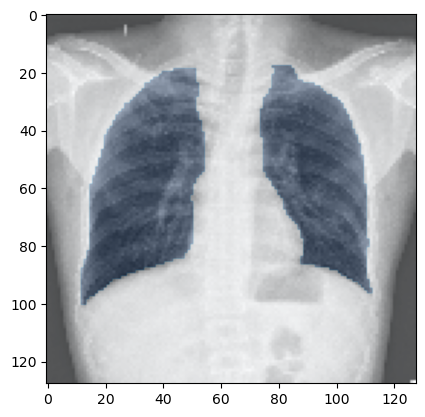

In [77]:
plt.imshow(img, cmap='gray')
plt.imshow(msk, cmap='Blues', alpha=0.3)

# [ 2 ] Val Generator

In [78]:
def val_generator(batch_size=10):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image_id'])
            mask_id_list = list(df['image_id'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            
            # create empty Y matrix - 1 channel
            Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)

        
            
            # Create X_val
            #================
            
            for i, image_id in enumerate(image_id_list):
                

                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                #image = resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                # insert the image into X_train
                X_val[i] = image
            
            
            # Create Y_val
            # ===============
                
            for j, mask_id in enumerate(mask_id_list):

                # set the path to the mask
                path = 'mask_dir/' + mask_id

                # read the mask
                mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                
                # expand dims from (800,600) to (800,600,1)
                mask = np.expand_dims(mask, axis=-1)
                
                # resize the mask
                #mask = resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                
                # insert the image into Y_train
                Y_val[j] = mask
                
            
            # Normalize the images
            X_val = X_val/255
            
            yield X_val, Y_val

In [79]:
# Test the generator

# initialize
val_gen = val_generator(batch_size=10)

# run the generator
X_val, Y_val = next(val_gen)

print(X_val.shape)
print(Y_val.shape)

(10, 128, 128, 3)
(10, 128, 128, 1)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


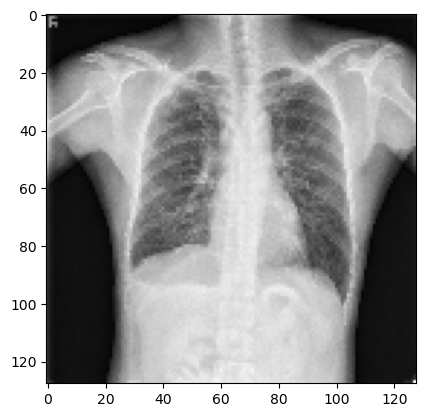

In [80]:
# print the image from X_val

img = X_val[7,:,:,:]
plt.imshow(img)

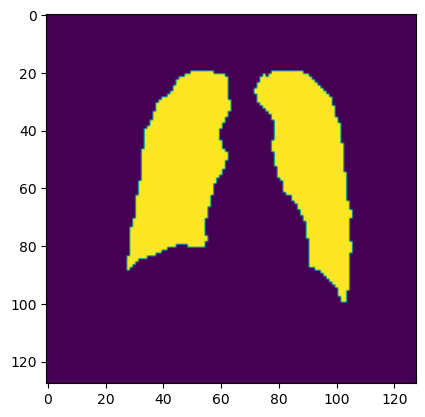

In [81]:
# print the mask from Y_val

msk = Y_val[7,:,:,0]
plt.imshow(msk)

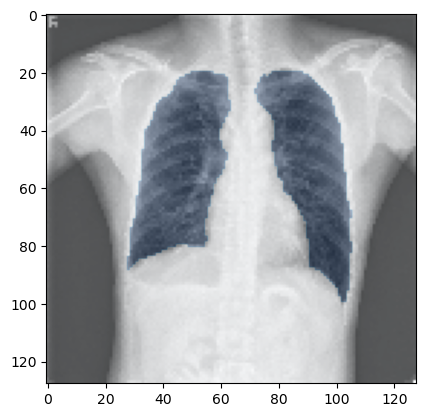

In [82]:
# Combine the mask and the image

plt.imshow(img, cmap='gray')
plt.imshow(msk, cmap='Blues', alpha=0.3)

# [ 3 ] Test Generator

In [83]:
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_test.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image_id'])
            mask_id_list = list(df['image_id'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            
            # create empty Y matrix - 1 channel
            Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
            


            
            # Create X_test
            #================
            
            for i, image_id in enumerate(image_id_list):
                

                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
           
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                #image = resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                # insert the image into X_train
                X_test[i] = image
                
             
            # Create Y_test
            # ===============
                
            for j, mask_id in enumerate(mask_id_list):

                # set the path to the mask
                path = 'mask_dir/' + mask_id

                # read the mask
                mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                
                # expand dims from (800,600) to (800,600,1)
                mask = np.expand_dims(mask, axis=-1)
                
                # resize the mask
                #mask = resize(mask, (IMAGE_HEIGHT, IMAGE_WIDTH), mode='constant', preserve_range=True)
                
                
                # insert the image into Y_train
                Y_test[j] = mask
            
            
            # Normalize the images
            X_test = X_test/255
            
            yield X_test, Y_test

In [84]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=5)

# run the generator
X_test, Y_test = next(test_gen)

print(X_test.shape)
print(Y_test.shape)

(5, 128, 128, 3)
(5, 128, 128, 1)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


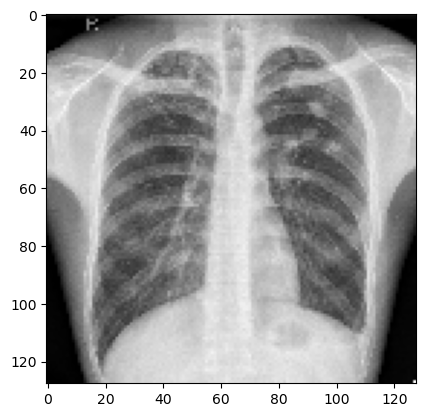

In [85]:
# print the image from X_test

img = X_test[1,:,:,:]
plt.imshow(img)

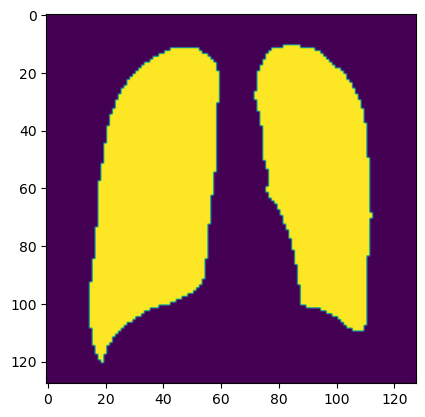

In [86]:
# print the mask from Y_test

msk = Y_test[1,:,:,0]
plt.imshow(msk)

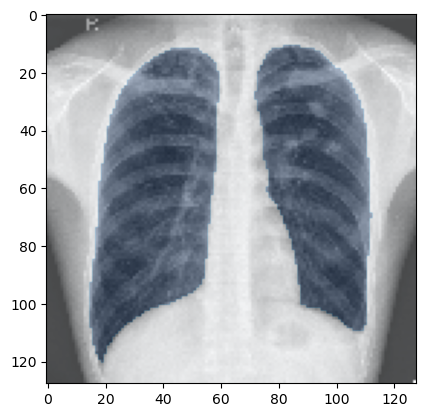

In [87]:
# Combine the mask and the image

plt.imshow(img, cmap='gray')
plt.imshow(msk, cmap='Blues', alpha=0.3)

# Model Architecture

In [99]:
import keras
from keras.layers import LSTM
from keras.models import Model, load_model
from keras.layers import Input, UpSampling2D
from keras.layers import Dropout, Lambda
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import MaxPooling2D
from keras.layers. import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

from keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)


from keras.optimizers import Adam
from keras.losses import binary_crossentropy

from keras.initializers import he_normal 

import tensorflow as tf

In [101]:
drop_out = 0.1
INIT_SEED = 101

In [102]:
inputs = Input((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))

# Note: Tensorflow.js does not support lambda layers.
#s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (inputs)
c1 = Dropout(drop_out) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (p1)
c2 = Dropout(drop_out) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (p2)
c3 = Dropout(drop_out) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (p3)
c4 = Dropout(drop_out) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (p4)
c5 = Dropout(drop_out) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (u6)
c6 = Dropout(drop_out) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (u7)
c7 = Dropout(drop_out) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (u8)
c8 = Dropout(drop_out) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (u9)
c9 = Dropout(drop_out) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer=he_normal(seed=INIT_SEED), padding='same') (c9)


outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['input_2[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                              

 conv2d_transpose_3 (Conv2D  (None, 128, 128, 16)         2064      ['conv2d_15[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatenate_3 (Concatenate  (None, 128, 128, 32)         0         ['conv2d_transpose_3[0][0]',  
 )                                                                   'conv2d_1[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 128, 128, 16)         4624      ['concatenate_3[0][0]']       
                                                                                                  
 dropout_8 (Dropout)         (None, 128, 128, 16)         0         ['conv2d_16[0][0]']           
                                                                                                  
 conv2d_17

# Create X_test

In [103]:
# initialize
test_gen = test_generator(batch_size=len(df_test))

# run the generator
X_test, Y_test = next(test_gen)

print(X_test.shape)
print(Y_test.shape)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


(100, 128, 128, 3)
(100, 128, 128, 1)


# Train the Model

In [104]:
num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = BATCH_SIZE
val_batch_size = BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [105]:
# Initialize the generators
train_gen = train_generator(batch_size=BATCH_SIZE)
val_gen = val_generator(batch_size=BATCH_SIZE)



filepath = "model.h5"

earlystopper = EarlyStopping(patience=5, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                                   verbose=1, mode='min')



log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, earlystopper, csv_logger, reduce_lr]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=40, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\752516909.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=40,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


Epoch 1/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IM

1/4 [======>.......................] - ETA: 2:21 - loss: 0.6482

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 56s - loss: 0.6479 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 27s - loss: 0.6271

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.6164 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 1: val_loss improved from inf to 0.54004, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 138s 30s/step - loss: 0.6164 - val_loss: 0.5400 - lr: 0.0010
Epoch 2/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:27 - loss: 0.5560

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 47s - loss: 0.5399 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 23s - loss: 0.5282

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.5172 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 2: val_loss improved from 0.54004 to 0.50021, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 107s 26s/step - loss: 0.5172 - val_loss: 0.5002 - lr: 0.0010
Epoch 3/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:08 - loss: 0.5938

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 48s - loss: 0.5427 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 24s - loss: 0.5002

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.4941 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 3: val_loss improved from 0.50021 to 0.36585, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 106s 28s/step - loss: 0.4941 - val_loss: 0.3658 - lr: 0.0010
Epoch 4/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:05 - loss: 0.3807

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 41s - loss: 0.3676 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 24s - loss: 0.3481

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.3455 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 4: val_loss improved from 0.36585 to 0.32256, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 103s 27s/step - loss: 0.3455 - val_loss: 0.3226 - lr: 0.0010
Epoch 5/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:06 - loss: 0.2674

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 45s - loss: 0.2659 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 24s - loss: 0.2609

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.2574 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 5: val_loss improved from 0.32256 to 0.24607, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 109s 29s/step - loss: 0.2574 - val_loss: 0.2461 - lr: 0.0010
Epoch 6/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:14 - loss: 0.1991

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 59s - loss: 0.2103 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 27s - loss: 0.2030

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.2050 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 6: val_loss improved from 0.24607 to 0.20484, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 109s 28s/step - loss: 0.2050 - val_loss: 0.2048 - lr: 0.0010
Epoch 7/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:05 - loss: 0.1697

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 44s - loss: 0.1869 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 22s - loss: 0.1748

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.1769 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 7: val_loss improved from 0.20484 to 0.14397, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 100s 26s/step - loss: 0.1769 - val_loss: 0.1440 - lr: 0.0010
Epoch 8/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:05 - loss: 0.1651

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 52s - loss: 0.1511 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 26s - loss: 0.1520

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.1486 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 8: val_loss improved from 0.14397 to 0.13032, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 119s 32s/step - loss: 0.1486 - val_loss: 0.1303 - lr: 0.0010
Epoch 9/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:51 - loss: 0.1437

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 1:00 - loss: 0.1287

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 27s - loss: 0.1247 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.1235 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 9: val_loss did not improve from 0.13032
4/4 [==============================] - 130s 31s/step - loss: 0.1235 - val_loss: 0.1444 - lr: 0.0010
Epoch 10/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:38 - loss: 0.1208

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 1:02 - loss: 0.1109

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 31s - loss: 0.1093 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.1097 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 10: val_loss did not improve from 0.13032

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4/4 [==============================] - 138s 35s/step - loss: 0.1097 - val_loss: 0.1473 - lr: 0.0010
Epoch 11/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:35 - loss: 0.1132

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 55s - loss: 0.1033 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 28s - loss: 0.1013

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.1015 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 11: val_loss improved from 0.13032 to 0.11852, saving model to model.h5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 122s 30s/step - loss: 0.1015 - val_loss: 0.1185 - lr: 5.0000e-04
Epoch 12/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:15 - loss: 0.1078

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 48s - loss: 0.0988 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 23s - loss: 0.0967

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.0973 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 12: val_loss did not improve from 0.11852
4/4 [==============================] - 103s 26s/step - loss: 0.0973 - val_loss: 0.1303 - lr: 5.0000e-04
Epoch 13/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 1:04 - loss: 0.1063

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 43s - loss: 0.0966 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 21s - loss: 0.0942

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.0946 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 13: val_loss did not improve from 0.11852

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
4/4 [==============================] - 94s 24s/step - loss: 0.0946 - val_loss: 0.1231 - lr: 5.0000e-04
Epoch 14/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 59s - loss: 0.1004

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 38s - loss: 0.0926

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 20s - loss: 0.0907

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.0910 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 14: val_loss did not improve from 0.11852
4/4 [==============================] - 85s 22s/step - loss: 0.0910 - val_loss: 0.1276 - lr: 2.5000e-04
Epoch 15/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 55s - loss: 0.1005

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 37s - loss: 0.0915

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 19s - loss: 0.0896

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.0900 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 15: val_loss did not improve from 0.11852

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
4/4 [==============================] - 85s 22s/step - loss: 0.0900 - val_loss: 0.1207 - lr: 2.5000e-04
Epoch 16/40


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


1/4 [======>.......................] - ETA: 59s - loss: 0.0979

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


2/4 [==============>...............] - ETA: 39s - loss: 0.0900

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


3/4 [=====================>........] - ETA: 19s - loss: 0.0879

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\4042370147.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


4/4 [==============================] - ETA: 0s - loss: 0.0884 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\1955275081.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_


Epoch 16: val_loss did not improve from 0.11852
4/4 [==============================] - 87s 23s/step - loss: 0.0884 - val_loss: 0.1248 - lr: 1.2500e-04
Epoch 16: early stopping


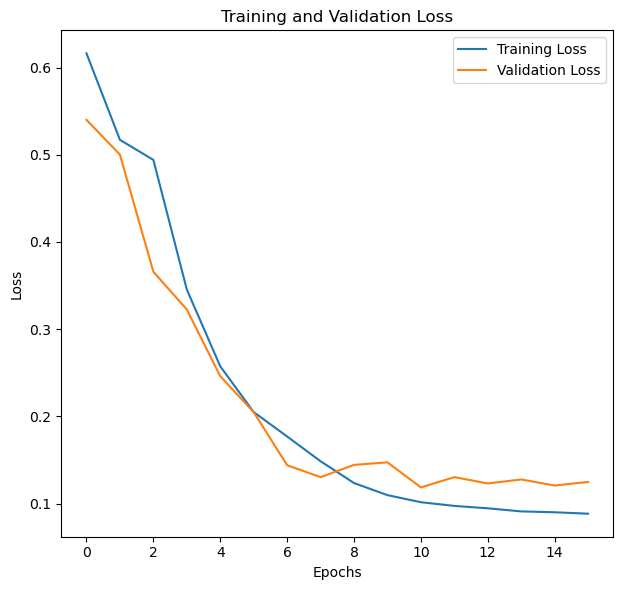

In [118]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout()
plt.show()


In [106]:
# Make a prediction

# initialize the test generator
test_gen = test_generator(batch_size=1)

model.load_weights('model.h5')
predictions = model.predict_generator(test_gen, 
                                      steps=len(df_test),  
                                      verbose=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\654260468.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_gen,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)


  3/100 [..............................] - ETA: 6s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

  8/100 [=>............................] - ETA: 5s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 11/100 [==>...........................] - ETA: 5s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 14/100 [===>..........................] - ETA: 4s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 20/100 [=====>........................] - ETA: 4s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 23/100 [=====>........................] - ETA: 4s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 27/100 [=======>......................] - ETA: 4s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 32/100 [========>.....................] - ETA: 3s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 36/100 [=========>....................] - ETA: 3s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 38/100 [==========>...................] - ETA: 3s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 43/100 [===========>..................] - ETA: 3s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 47/100 [=============>................] - ETA: 2s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 51/100 [==============>...............] - ETA: 2s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 55/100 [===============>..............] - ETA: 2s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 59/100 [================>.............] - ETA: 2s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 63/100 [=================>............] - ETA: 2s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 67/100 [===================>..........] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 70/100 [====================>.........] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 72/100 [====================>.........] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 75/100 [=====================>........] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 76/100 [=====================>........] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 78/100 [======================>.......] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 80/100 [=======================>......] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 82/100 [=======================>......] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 84/100 [========================>.....] - ETA: 1s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 86/100 [========================>.....] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 89/100 [=========================>....] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 92/100 [==========================>...] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 94/100 [===========================>..] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 96/100 [===========================>..] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

 99/100 [============================>.] - ETA: 0s

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\2884318849.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAG

100/100 [==============================] - 9s 75ms/step


In [107]:
preds_test_thresh = (predictions >= 0.7).astype(np.uint8)

preds_test_thresh.shape

print(preds_test_thresh.min())
print(preds_test_thresh.max())

0
1


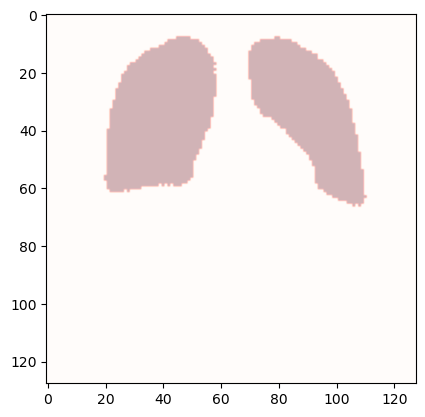

In [108]:
# This is a predicted mask

mask = preds_test_thresh[3,:,:,0]
plt.imshow(mask, cmap='Reds', alpha=0.3)

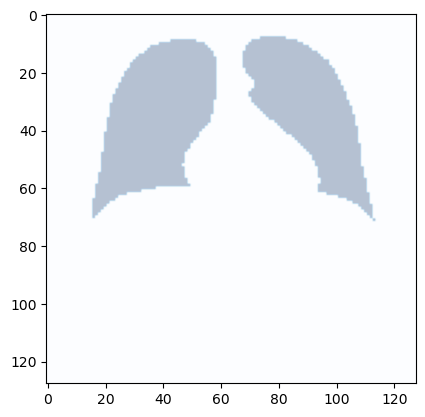

In [109]:
# This is a true mask

true_mask = Y_test[3,:,:,0]
plt.imshow(true_mask, cmap='Blues', alpha=0.3)

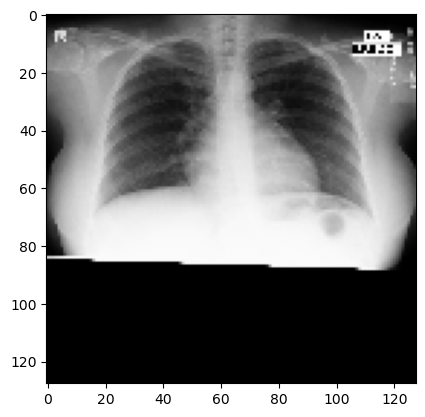

In [110]:
# This is the x-ray image

image = X_test[3,:,:,:]

plt.imshow(image)

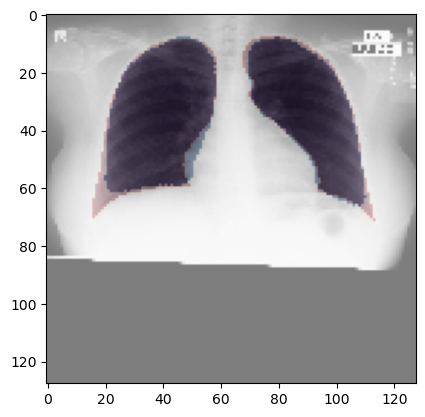

In [111]:
# This is an overlay of the pred mask, true mask and 
# the x-ray image.

plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\531000289.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\531000289.py:66: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_22508\531000289.py:119: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


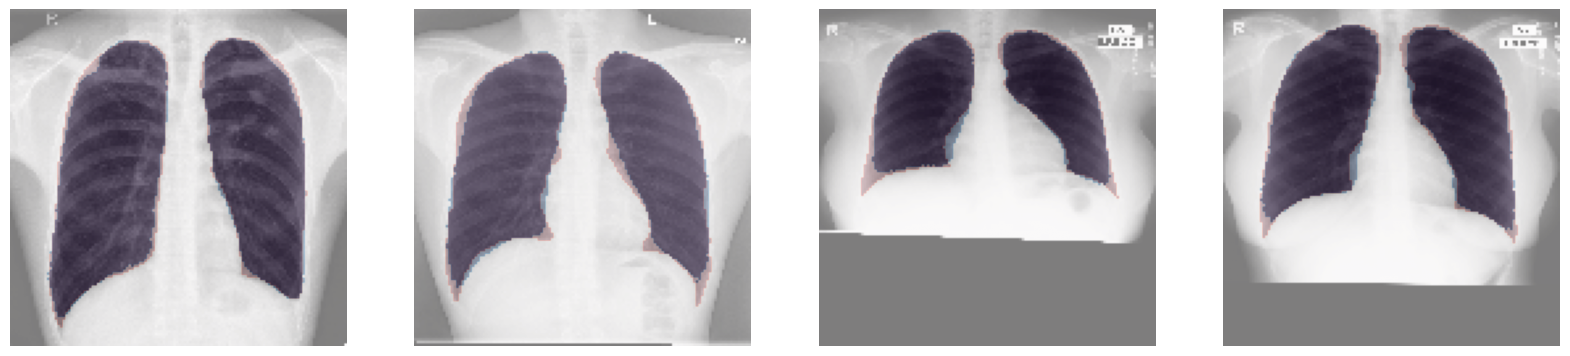

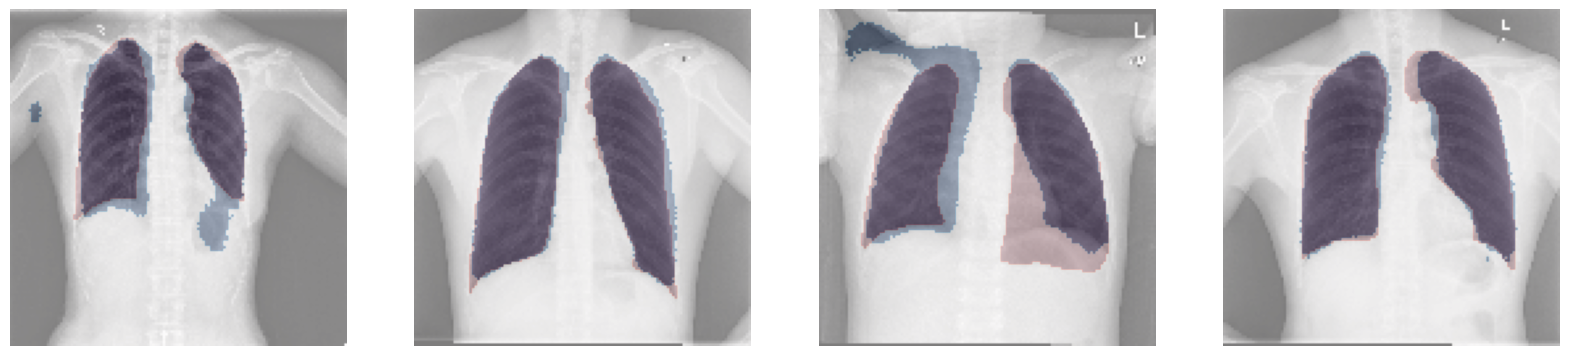

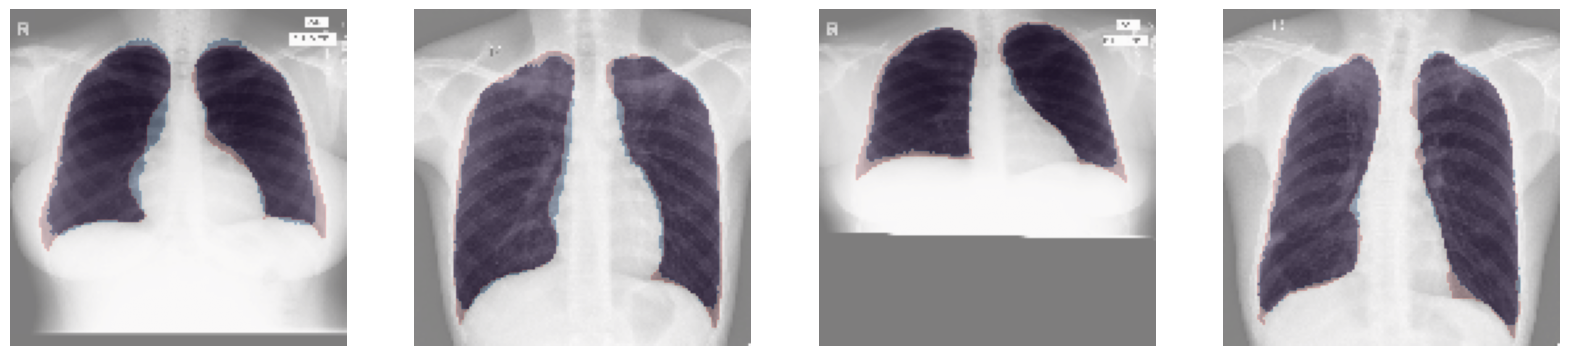

In [113]:
# set up the canvas for the subplots
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.axis('Off')

predicted_masks = preds_test_thresh



    
# image
plt.subplot(1,4,1)
image = X_test[1,:,:,:] 
mask = predicted_masks[1, :, :, 0]
true_mask = Y_test[1, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,2)
image = X_test[2,:,:,:] 
mask = predicted_masks[2, :, :, 0]
true_mask = Y_test[2, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,3)
image = X_test[3,:,:,:]
mask = predicted_masks[3, :, :, 0]
true_mask = Y_test[3, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,4)
image = X_test[4,:,:,:] 
mask = predicted_masks[4, :, :, 0]
true_mask = Y_test[4, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')



# ============ #


# set up the canvas for the subplots
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.axis('Off')


# image
plt.subplot(1,4,1)
image = X_test[5,:,:,:] 
mask = predicted_masks[5, :, :, 0]
true_mask = Y_test[5, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,2)
image = X_test[6,:,:,:] 
mask = predicted_masks[6, :, :, 0]
true_mask = Y_test[6, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,3)
image = X_test[7,:,:,:] 
mask = predicted_masks[7, :, :, 0]
true_mask = Y_test[7, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,4)
image = X_test[8,:,:,:] 
mask = predicted_masks[8, :, :, 0]
true_mask = Y_test[8, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# ============ #


# set up the canvas for the subplots
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.axis('Off')


# image
plt.subplot(1,4,1)
image = X_test[9,:,:,:] 
mask = predicted_masks[9, :, :, 0]
true_mask = Y_test[9, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,2)
image = X_test[10,:,:,:] 
mask = predicted_masks[10, :, :, 0]
true_mask = Y_test[10, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,3)
image = X_test[11,:,:,:] 
mask = predicted_masks[11, :, :, 0]
true_mask = Y_test[11, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


# image
plt.subplot(1,4,4)
image = X_test[12,:,:,:] 
mask = predicted_masks[12, :, :, 0]
true_mask = Y_test[12, :, :, 0]
plt.imshow(image, cmap='gray')
plt.imshow(true_mask, cmap='Reds', alpha=0.3)
plt.imshow(mask, cmap='Blues', alpha=0.3)
plt.axis('off')


plt.show()

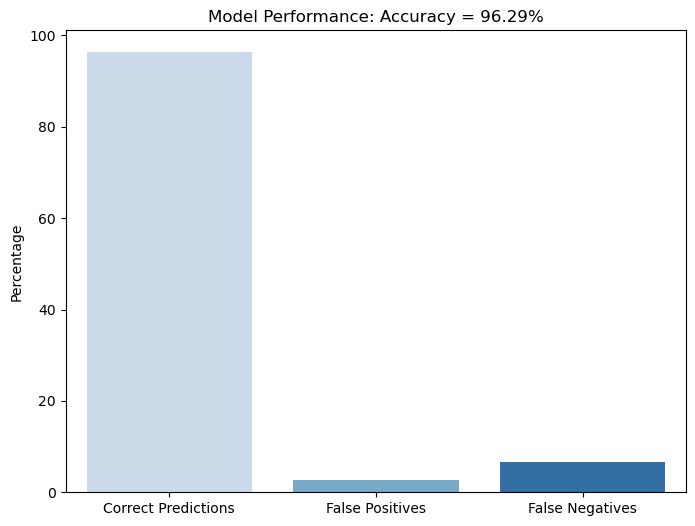

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'true_labels' and 'predicted_labels' are binary arrays (0 or 1)
true_labels = Y_test.reshape(-1)  # Flatten the true masks
predicted_labels = (predicted_masks > threshold).reshape(-1)  # Flatten the predicted masks

# Create a confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels) * 100

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate percentages
total_samples = len(true_labels)
false_positive_rate = fp / (fp + tn) * 100
false_negative_rate = fn / (fn + tp) * 100

# Plot the percentages
labels = ['Correct Predictions', 'False Positives', 'False Negatives']
percentages = [accuracy, false_positive_rate, false_negative_rate]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=percentages, palette='Blues')
plt.title(f'Model Performance: Accuracy = {accuracy:.2f}%')
plt.ylabel('Percentage')
plt.show()
